In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import r2_score
%matplotlib inline 
sns.set(style="ticks")

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("advertising.csv")

In [6]:
data.head(2)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [9]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

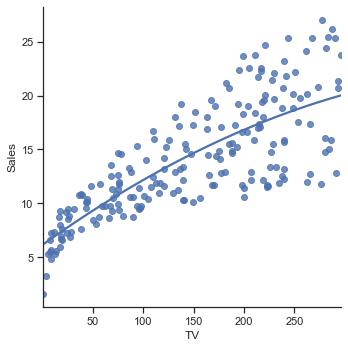

In [12]:
sns.lmplot(x="TV", y="Sales", data=data, order=2, ci=None)

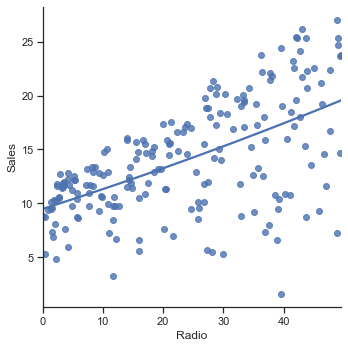

In [15]:
sns.lmplot(x="Radio", y="Sales", data=data, order=2, ci=None)

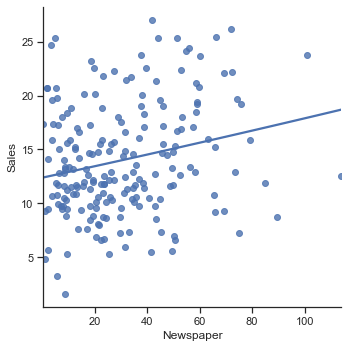

In [16]:
sns.lmplot(x="Newspaper", y="Sales", data=data, order=2, ci=None)

In [18]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Между TV и Sales есть корреляция 0.78

In [152]:
x = data["TV"].values
y = data["Sales"].values

reg = BayesianRidge(fit_intercept=True).fit(x.reshape(-1, 1), y.reshape(-1, 1))
reg.coef_
reg.intercept_

7.054854152265513

In [153]:
def func(w, b, x):
    return w*x + b

In [154]:
x_t = list(range(0, 300, 5))
y_t = [func(reg.coef_[0], reg.intercept_, x) for x in x_t]
y_tt = reg.predict(x.reshape(-1, 1))

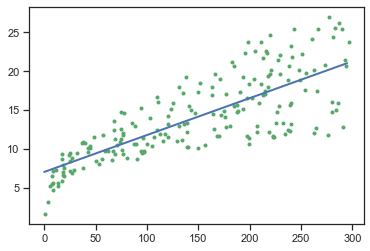

In [155]:
plt.plot(x, y, 'g.')
plt.plot(x_t, y_t, 'b', linewidth=2.0)
plt.show()

### Модель линейной регрессии дала неплохой результат

## SVM

In [156]:
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR

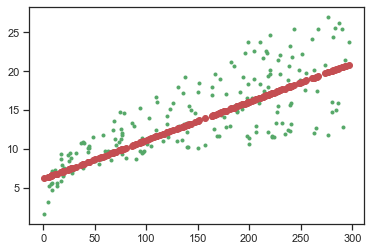

In [157]:
lin_SVR = LinearSVR(C=1.0, max_iter=10000)
lin_SVR.fit(x.reshape(-1, 1), y)
predict = lin_SVR.predict(x.reshape(-1, 1))
plt.plot(x, y, 'g.')
plt.plot(x, predict, 'ro')

## Деревья решений

In [158]:
dec_tree = DecisionTreeRegressor(random_state=1, max_depth=5)
dec_tree.fit(data, data["Sales"])
dec_tree


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [159]:
dec_predict = dec_tree.predict(data)

[Text(167.4, 199.32, 'X[3] <= 15.1\nmse = 27.086\nsamples = 200\nvalue = 14.023'),
 Text(83.7, 163.07999999999998, 'X[3] <= 10.0\nmse = 7.31\nsamples = 125\nvalue = 10.67'),
 Text(41.85, 126.83999999999999, 'X[3] <= 7.45\nmse = 3.527\nsamples = 45\nvalue = 7.767'),
 Text(20.925, 90.6, 'X[0] <= 4.75\nmse = 2.173\nsamples = 18\nvalue = 5.872'),
 Text(10.4625, 54.359999999999985, 'X[3] <= 2.4\nmse = 0.64\nsamples = 2\nvalue = 2.4'),
 Text(5.23125, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = 1.6'),
 Text(15.693750000000001, 18.119999999999976, 'mse = -0.0\nsamples = 1\nvalue = 3.2'),
 Text(31.387500000000003, 54.359999999999985, 'X[3] <= 6.25\nmse = 0.669\nsamples = 16\nvalue = 6.306'),
 Text(26.15625, 18.119999999999976, 'mse = 0.108\nsamples = 7\nvalue = 5.443'),
 Text(36.61875, 18.119999999999976, 'mse = 0.075\nsamples = 9\nvalue = 6.978'),
 Text(62.775000000000006, 90.6, 'X[3] <= 9.0\nmse = 0.442\nsamples = 27\nvalue = 9.03'),
 Text(52.3125, 54.359999999999985, 'X[3] <= 8.25\n

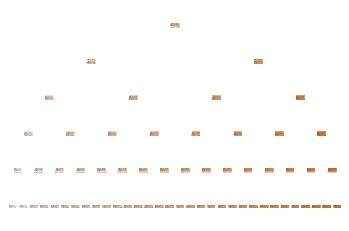

In [160]:
from sklearn import tree
tree.plot_tree(dec_tree, filled=True)

## Метрики качества

In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 

print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, y_tt))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, y_tt))
print("Коэффициент детерминации: ", r2_score(y, y_tt))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, predict))
print("Коэффициент детерминации: ", r2_score(y, predict))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, dec_predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, dec_predict))
print("Коэффициент детерминации: ", r2_score(y, dec_predict))

Метрики для линейной модели:

Средняя абсолютная ошибка:  2.550919383216356
Средняя квадратичная ошибка:  10.512821002854928
Коэффициент детерминации:  0.6118688451058344


Метрики для SVM-модели:

Средняя абсолютная ошибка:  2.5708683334350892
Средняя квадратичная ошибка:  10.859652690875892
Коэффициент детерминации:  0.5990638916505333


Метрики для Decision Tree:

Средняя абсолютная ошибка:  0.14353164841694266
Средняя квадратичная ошибка:  0.03201810934980053
Коэффициент детерминации:  0.9988178980926156


## Подбор гиперпараметров. Кросс-валидация

In [162]:
from sklearn.model_selection import cross_validate

In [111]:
scoring = {'mean': 'neg_mean_absolute_error', 'square': 'neg_mean_squared_error', 'r2': 'r2'}

In [163]:
scores_regr = cross_validate(BayesianRidge(fit_intercept=True), 
                         x.reshape(-1, 1), y, cv=3, scoring=scoring)
scores_regr

{'fit_time': array([0.00085902, 0.00085711, 0.00055289]),
 'score_time': array([0.00140524, 0.00080299, 0.00078702]),
 'test_mean': array([-2.51215213, -2.46200408, -2.76711466]),
 'test_square': array([-10.83437466,  -9.33658309, -11.90833409]),
 'test_r2': array([0.61497417, 0.65311667, 0.53715304])}

In [164]:
scores_svm = cross_validate(LinearSVR(C=1.0, max_iter=10000), 
                         x.reshape(-1, 1), y, cv=3, scoring=scoring)
scores_svm

{'fit_time': array([0.03139281, 0.02713585, 0.02338099]),
 'score_time': array([0.00076604, 0.00061393, 0.00054908]),
 'test_mean': array([-2.54098772, -2.37148251, -3.1291242 ]),
 'test_square': array([-11.0231287 ,  -9.81978964, -15.84997398]),
 'test_r2': array([0.60826634, 0.63516403, 0.38395142])}

In [165]:
scores_dec = cross_validate(DecisionTreeRegressor(random_state=1, max_depth=3), 
                         data, data["Sales"], cv=5, scoring=scoring)
scores_dec

{'fit_time': array([0.00271297, 0.0020709 , 0.00206208, 0.00199294, 0.00195193]),
 'score_time': array([0.0018599 , 0.00148034, 0.00148678, 0.00142694, 0.0014143 ]),
 'test_mean': array([-0.72293478, -0.7307461 , -0.66116873, -0.85487267, -0.91550049]),
 'test_square': array([-0.64975012, -0.70991464, -0.63349151, -1.4104023 , -1.08449788]),
 'test_r2': array([0.97486214, 0.97589358, 0.97175881, 0.95176776, 0.95938815])}

In [166]:
print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_regr['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_regr['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_regr['test_r2']))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_svm['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_svm['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_svm['test_r2']))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_dec['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_dec['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_dec['test_r2']))

Метрики для линейной модели:

Средняя абсолютная ошибка:  -2.580423621885709
Средняя квадратичная ошибка:  -10.693097277894969
Коэффициент детерминации:  0.601747959666948


Метрики для SVM-модели:

Средняя абсолютная ошибка:  -2.6805314771806956
Средняя квадратичная ошибка:  -12.23096410841425
Коэффициент детерминации:  0.5424605962417798


Метрики для Decision Tree:

Средняя абсолютная ошибка:  -0.7770445553321956
Средняя квадратичная ошибка:  -0.8976112886827845
Коэффициент детерминации:  0.9667340888852873


## Оптимизация с помощью решетчатого поиска

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [169]:
%%time
clf_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='r2')
clf_gs.fit(x.reshape(-1, 1), y)

CPU times: user 48.9 ms, sys: 1.26 ms, total: 50.2 ms
Wall time: 49.2 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [170]:
# Лучшая модель
clf_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [171]:
clf_gs.best_score_

0.5464056968965096

In [172]:
clf_gs.best_params_

{'max_depth': 3}

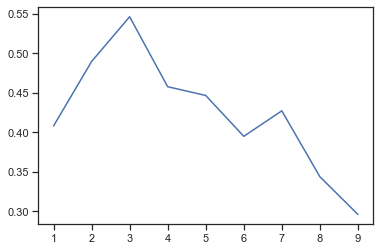

In [173]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### Оптимизация SVM

In [174]:
param_grid = {'C': [0.1,1, 10, 100], 'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [175]:
grid = GridSearchCV(LinearSVR(),param_grid,refit=True,verbose=2)
grid.fit(x.reshape(-1, 1),y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.2 ..............................................
[CV] ............................... C=0.1, epsilon=0.2, total=   0.0s
[CV] C=0.1, epsilon=0.2 ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=1, epsilon=0.1, total=   0.0s
[CV] C=1, epsilon=0.1 ................................................
[CV] ................................. C=1, epsilon=0.1, total=   0.0s
[CV] C=1, epsilon=0.1 ................................................
[CV] ................................. C=1, epsilon=0.1, total=   0.0s
[CV] C=1, epsilon=0.1 ................................................
[CV] ................................. C=1, epsilon=0.1, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] ................................. C=1, epsilon=0.2, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] ................................. C=1, epsilon=0.2, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] ................................. C=1, epsilon=0.2, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] .

[CV] ............................... C=100, epsilon=0.1, total=   0.0s
[CV] C=100, epsilon=0.1 ..............................................
[CV] ............................... C=100, epsilon=0.1, total=   0.0s
[CV] C=100, epsilon=0.1 ..............................................
[CV] ............................... C=100, epsilon=0.1, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] ............................... C=100, epsilon=0.2, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] ............................... C=100, epsilon=0.2, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] ............................... C=100, epsilon=0.2, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] ............................... C=100, epsilon=0.2, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                     0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [176]:
grid.best_estimator_

LinearSVR(C=10, dual=True, epsilon=1.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [177]:
grid.best_score_

0.5440492644611755

In [178]:
grid.best_params_

{'C': 10, 'epsilon': 1.0}

In [182]:
parameters = {"alpha_1": np.logspace(-13,-5,10),
              "alpha_2": np.logspace(-9,-3,10),
              "lambda_1": np.logspace(-10,-5,10),
              "lambda_2": np.logspace(-11,-4,10)}

grid_regr = GridSearchCV(BayesianRidge(), parameters, cv=3, n_jobs=-1)
grid_regr.fit(x.reshape(-1, 1), y)    

GridSearchCV(cv=3, error_score=nan,
             estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                     alpha_init=None, compute_score=False,
                                     copy_X=True, fit_intercept=True,
                                     lambda_1=1e-06, lambda_2=1e-06,
                                     lambda_init=None, n_iter=300,
                                     normalize=False, tol=0.001,
                                     verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha_1': array([1.00000000e-13, 7.74263683e-13, 5.99484250e-...
                         'lambda_1': array([1.00000000e-10, 3.59381366e-10, 1.29154967e-09, 4.64158883e-09,
       1.66810054e-08, 5.99484250e-08, 2.15443469e-07, 7.74263683e-07,
       2.78255940e-06, 1.00000000e-05]),
                         'lambda_2': array([1.00000000e-11, 5.99484250e-11, 3.59381366e-10, 2.15443469e-09,
       1.29154967e-08, 7.74263683e-08

In [186]:
grid_regr.best_estimator_

BayesianRidge(alpha_1=1e-05, alpha_2=1e-09, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-10, lambda_2=0.0001, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [187]:
grid_regr.best_score_

0.6017531508217578

In [188]:
grid_regr.best_params_

{'alpha_1': 1e-05, 'alpha_2': 1e-09, 'lambda_1': 1e-10, 'lambda_2': 0.0001}

In [189]:
reg = BayesianRidge(fit_intercept=True, alpha_1=1e-05, alpha_2=1e-09, lambda_1=1e-10, lambda_2=0.0001).fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_tt = reg.predict(x.reshape(-1, 1))

lin_SVR = LinearSVR(C=1.0, max_iter=10000, epsilon=1.0)
lin_SVR.fit(x.reshape(-1, 1), y)
predict = lin_SVR.predict(x.reshape(-1, 1))

dec_tree = DecisionTreeRegressor(random_state=1, max_depth=3)
dec_tree.fit(data, data["Sales"])
dec_predict = dec_tree.predict(data)

In [190]:
print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, y_tt))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, y_tt))
print("Коэффициент детерминации: ", r2_score(y, y_tt))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, predict))
print("Коэффициент детерминации: ", r2_score(y, predict))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, dec_predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, dec_predict))
print("Коэффициент детерминации: ", r2_score(y, dec_predict))

Метрики для линейной модели:

Средняя абсолютная ошибка:  2.5508292802546
Средняя квадратичная ошибка:  10.512794897173503
Коэффициент детерминации:  0.6118698089221382


Метрики для SVM-модели:

Средняя абсолютная ошибка:  2.5996867264932724
Средняя квадратичная ошибка:  11.18839596468356
Коэффициент детерминации:  0.586926758668624


Метрики для Decision Tree:

Средняя абсолютная ошибка:  0.7095532407407409
Средняя квадратичная ошибка:  0.7222188657407407
Коэффициент детерминации:  0.9733358303760538


## После подбора параметров модели показали лучший результат, чем без подбора.